# Assignment-1
Classification model to predict the heart diseases

In [1]:
pip install ucimlrepo

In [2]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from ucimlrepo import fetch_ucirepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
df=heart_disease = fetch_ucirepo(id=45)
print("Keys are>>>>",df.keys())

# features
X = heart_disease.data.features
X_df=pd.DataFrame(X)
print(X_df)


Keys are>>>> dict_keys(['data', 'metadata', 'variables'])
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0    

In [4]:
# target
y = heart_disease.data.targets
y_df=pd.DataFrame(y)
print(y_df)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


In [5]:
# metadata
print(heart_disease.metadata)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [6]:
from sklearn.impute import SimpleImputer

# Initialize the imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_df_imputed = pd.DataFrame(imputer.fit_transform(X_df), columns=X_df.columns)

# Ensure that the target variable `y` has the correct index (same as X_df_imputed)
y_imputed = y.loc[X_df_imputed.index]

In [7]:
# Split the data into training and testing sets (75% train, 25% test)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_df_imputed, y_imputed, test_size=0.25, random_state=42)

In [8]:
print(xtrain.shape)
print(xtest.shape)
print("#########################################################")
print(ytrain.shape)
print(ytest.shape)

# ytest =np.array(ytest).ravel()

(227, 13)
(76, 13)
#########################################################
(227, 1)
(76, 1)


In [9]:
#Create and train the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
kmodel = KNeighborsClassifier(n_neighbors=11)
ytrain = np.array(ytrain).ravel()
kmodel.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=11)

In [10]:
#make the prediction on the data given

ypred = kmodel.predict(xtrain)

#Compare the predicted value with given label

accuracy = (ytrain.flatten() == ypred).sum() / len(xtrain)
print(accuracy)

0.5462555066079295


In [22]:
# ypred = kmodel.predict(xtest)

# accuracy = (ytest.flatten() == ypred).sum() / len(xtest)
# print(accuracy)


ypred = kmodel.predict(xtest)
accuracy=(ytest == ypred.reshape(-1,1)).sum() / len(xtest)
print(accuracy)

num    0.539474
dtype: float64


In [19]:
print("Training accuracy:", kmodel.score(xtrain, ytrain))
print("Testing accuracy:", kmodel.score(xtest, ytest))

Training accuracy: 0.5462555066079295
Testing accuracy: 0.5394736842105263


In [24]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Reshape ytest and ypred to be 1-dimensional arrays
ytest_1d = np.array(ytest).ravel()  # Convert to 1D
ypred_1d = np.array(ypred).ravel()  # Convert to 1D

# Calculate accuracy
accuracy = accuracy_score(ytest_1d, ypred_1d)
print(f"Accuracy: {accuracy:.2f}")

# Check unique predicted labels
print("Unique predicted labels:", set(ypred_1d))

# Check the distribution of true labels
print("Unique true labels:", set(ytest_1d))
print("Counts of each class in ytest:")
print(pd.Series(ytest_1d).value_counts())

# Print classification report with zero_division parameter to handle zero division errors
print("\nClassification Report:")
print(classification_report(ytest_1d, ypred_1d, zero_division=0))


Accuracy: 0.54
Unique predicted labels: {0, 1, 2, 3}
Unique true labels: {0, 1, 2, 3, 4}
Counts of each class in ytest:
0    39
1    15
2    10
3     8
4     4
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        39
           1       0.00      0.00      0.00        15
           2       1.00      0.20      0.33        10
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.54        76
   macro avg       0.32      0.24      0.22        76
weighted avg       0.43      0.54      0.43        76



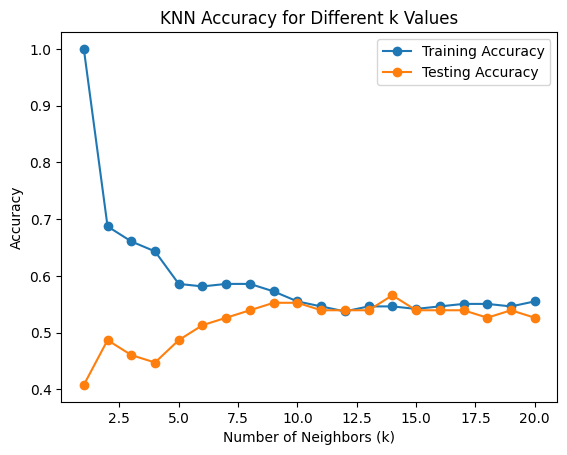

In [25]:
import matplotlib.pyplot as plt

training_acc = []
testing_acc = []
k_range = range(1, 21)

# Try different values of k (number of neighbors)
for k in k_range:
    kmodel = KNeighborsClassifier(n_neighbors=k)
    kmodel.fit(xtrain, ytrain.ravel())

    # Append training and testing accuracy
    training_acc.append(kmodel.score(xtrain, ytrain))
    testing_acc.append(kmodel.score(xtest, ytest))

# Plot the accuracies
plt.plot(k_range, training_acc, label="Training Accuracy", marker='o')
plt.plot(k_range, testing_acc, label="Testing Accuracy", marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
feature_names = X_df_imputed.columns

# Example new input data
new_data = np.array([[63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0]])

# Convert the new input data into a DataFrame with the same feature names
new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Make predictions
prediction = kmodel.predict(new_data_df)
proba = kmodel.predict_proba(new_data_df)

print(f"Predicted class: {prediction[0]}")
print(f"Class probabilities: {proba}")


Predicted class: 0
Class probabilities: [[0.65 0.25 0.1  0.   0.  ]]
